In [1]:
#기본 지도학습 알고리즘 
#선형회귀
#선형회귀 용어
#선형회귀 Linear Regression
#집 크기 주어졌을때 집값 예측
#데이터를 가장 잘 대변해주는 선을 찾아내는 것 
#가장 적절한 하나의 선을 찾아내는 것
# 최적선 line of best fit

#머신러닝(지도/비지도/강화 학습)
# 선형회기 - 지도학습 집값(답): 집 크기
# 지도학습(분류/회귀)- 집값: 회기


#05. 가설함수
# hypothesis function

# 가설함수 평가법
# 07. 평균 제곱 오차(MSE)
# 08. 평균 제곱 오차 일반화

# 10. 손실 함수(Loss Function)
# 가설 함수의 성능을 평가하는 함수
# 손실 함수가 작으면 가설함수가 데이터에 잘 맞다
# 손실 함수가 크면 가설함수가 데이터에 잘 안맞다
# 인풋 :세타
# 세타 값들을 바꿔 손실 함수의 아웃풋을 최소화


# 12. 경사 하강법(Gradient Descent) 개념

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def prediction(theta_0, theta_1, x):
    """주어진 학습 데이터 벡터 x에 대해서 모든 예측 값을 벡터로 리턴하는 함수"""
    return theta_0 + theta_1 * x
    

In [4]:
def prediction_difference(theta_0, theta_1, x, y):
    """모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해주는 함수"""
    return prediction(theta_0, theta_1, x) - y

In [5]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        # 코드를 쓰세요
        theta_0 = theta_0 - alpha * error.mean()
        theta_1 = theta_1 - alpha * (error * x).mean()
        
    return theta_0, theta_1

In [6]:
    
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1 = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

theta_0, theta_1
    

(np.float64(0.16821801417752186), np.float64(0.3438032402351199))

In [7]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    m = len(x)
    cost_list = []
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = (error@error) / (2*m)
        cost_list.append(cost)
        
        theta_0 = theta_0-alpha*error.mean()
        theta_1 = theta_1-alpha*(error*x).mean()
        
    return theta_0, theta_1, cost_list
    

In [8]:
# theta 값들 초기화 (아무 값이나 시작함)
th_0 = 2.5
th_1 = 0

In [9]:
# 학습률 0.1로 200번 경사 하강
th_0, th_1, cost_list = gradient_descent(th_0, th_1, house_size, house_price, 200, 0.1)

In [10]:
th_0, th_1

(np.float64(0.16821801417752186), np.float64(0.3438032402351199))

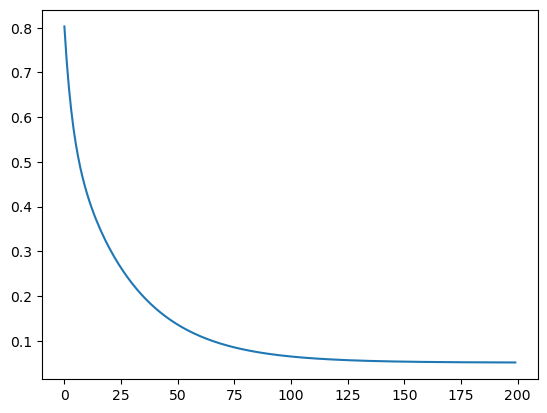

In [11]:
plt.plot(cost_list)#경사하강을 반복할 수록 손실이 줄어든다. 

In [12]:
#손실이 줄어드는것과 실제 가설함수 시각화 코드 추가
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    m = len(x)
    cost_list = []
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = (error@error) / (2*m)
        cost_list.append(cost)
        
        theta_0 = theta_0-alpha*error.mean()
        theta_1 = theta_1-alpha*(error*x).mean()

        if _%10==0:#산점도
            plt.scatter(house_size, house_price)
            plt.plot(house_size, prediction(theta_0, theta_1, x), color='red')
            plt.show()
        
    return theta_0, theta_1, cost_list
    

In [13]:
# theta 값들 초기화 (아무 값이나 시작함)
th_0 = 2.5
th_1 = 0

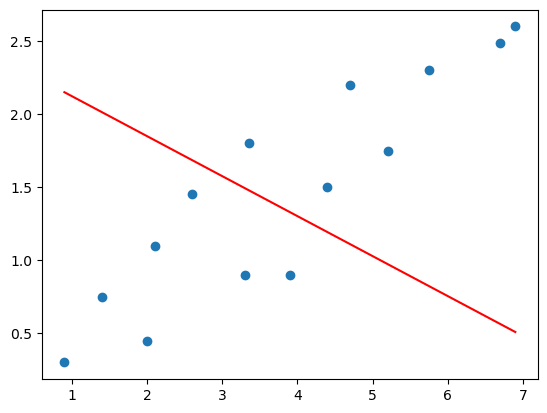

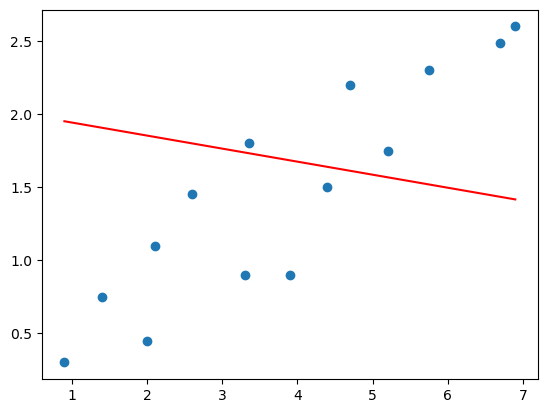

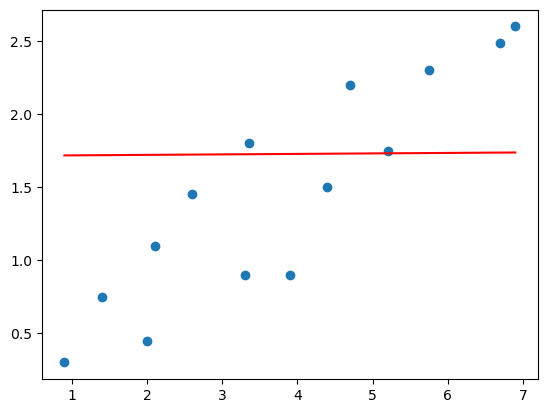

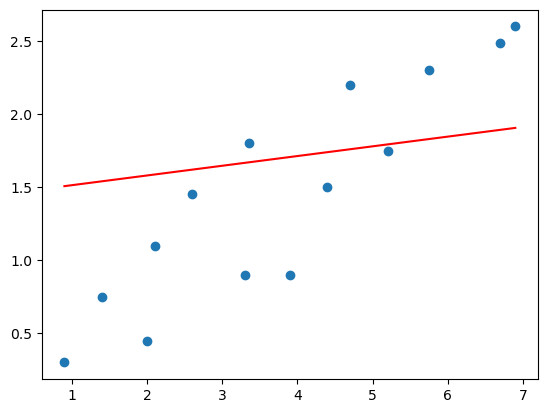

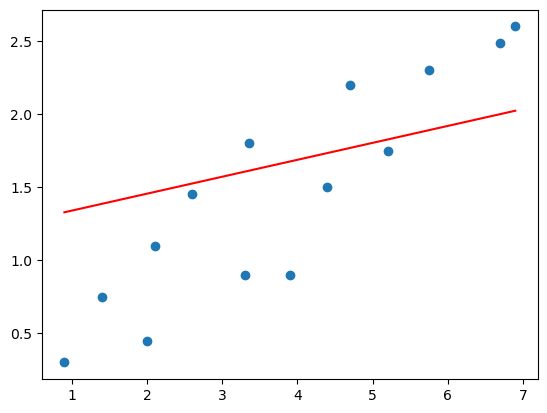

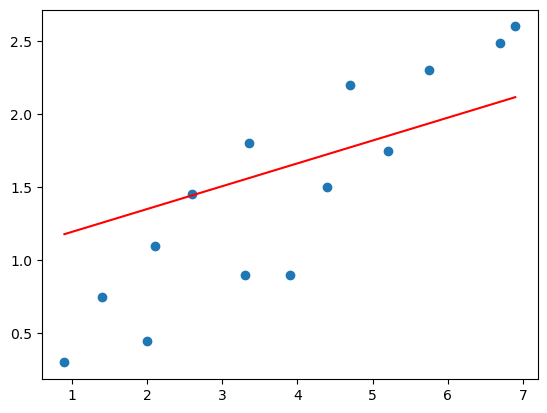

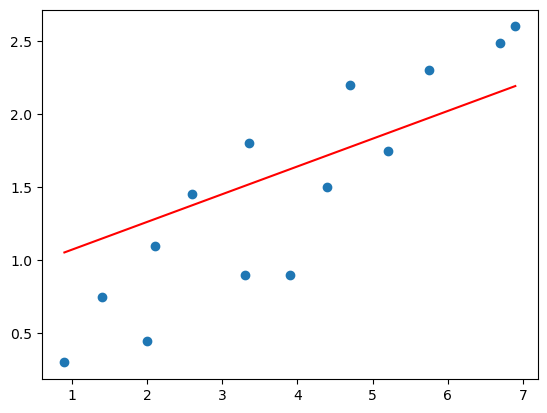

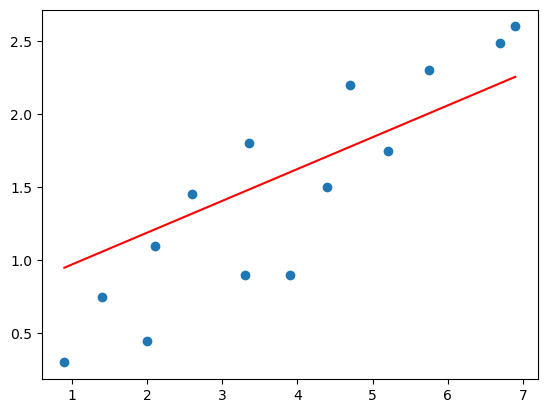

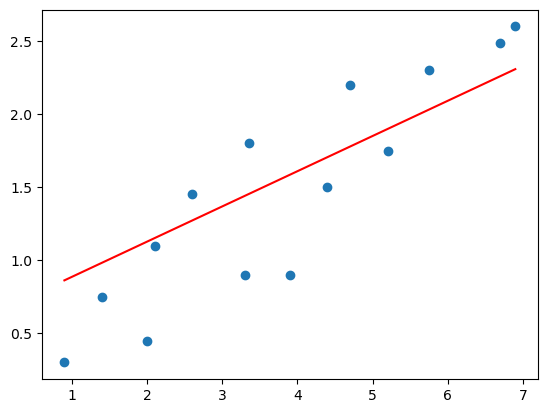

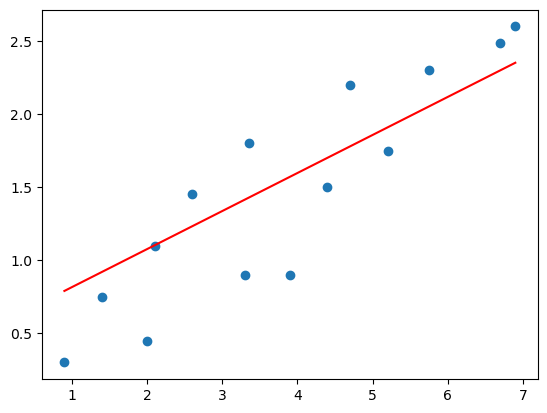

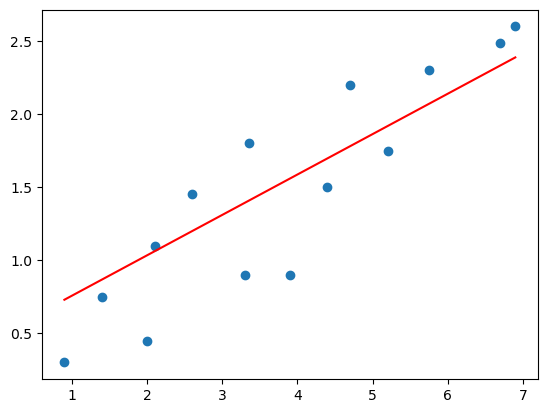

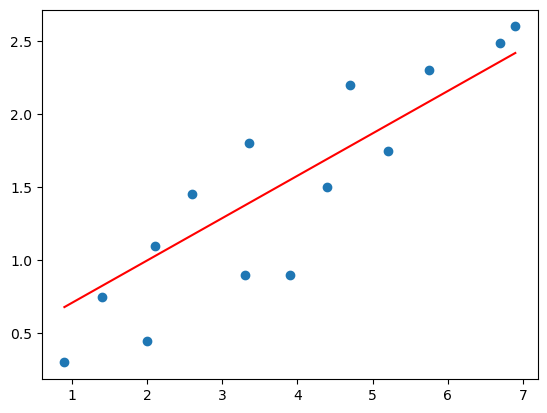

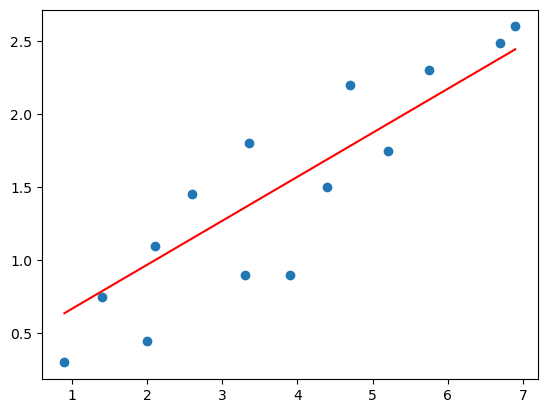

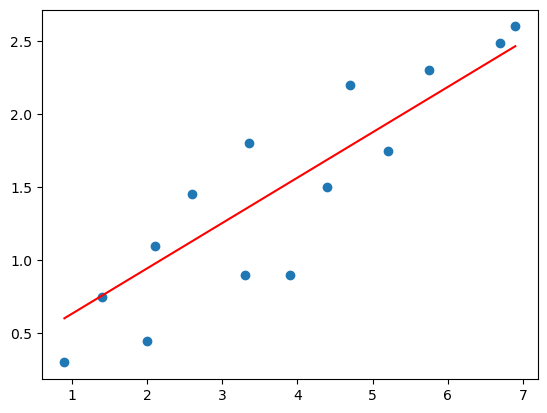

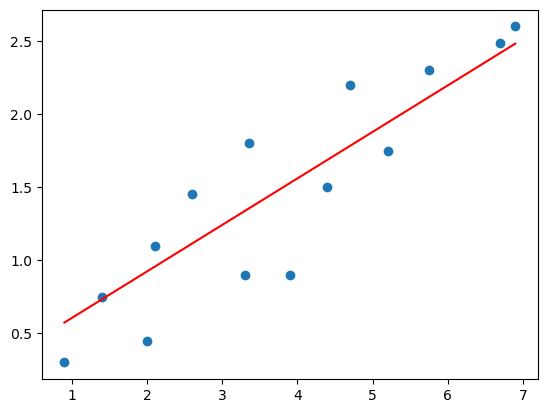

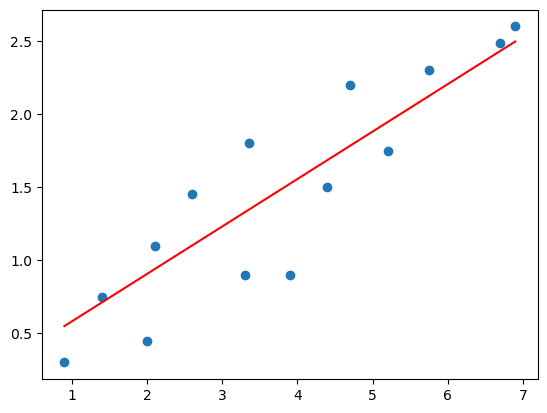

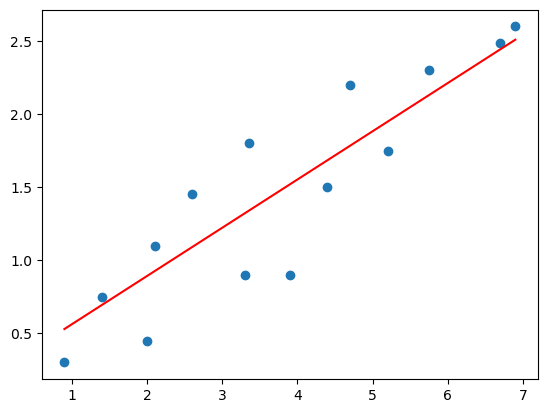

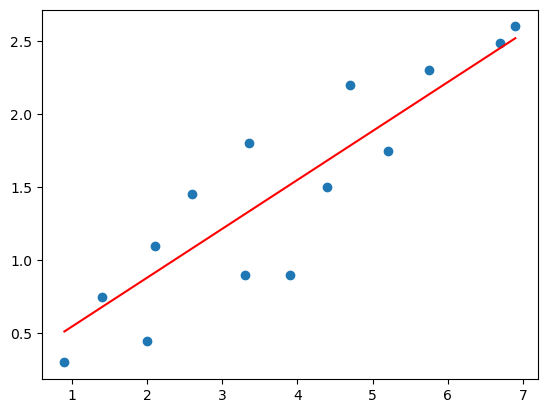

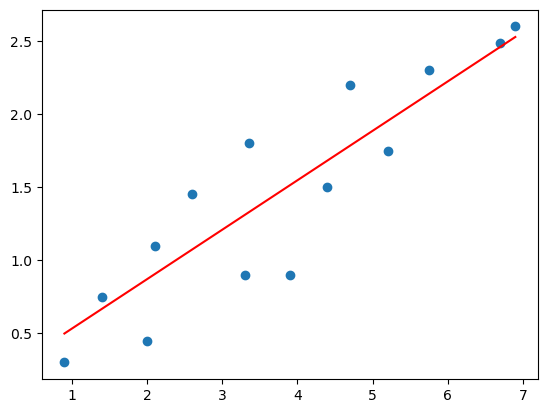

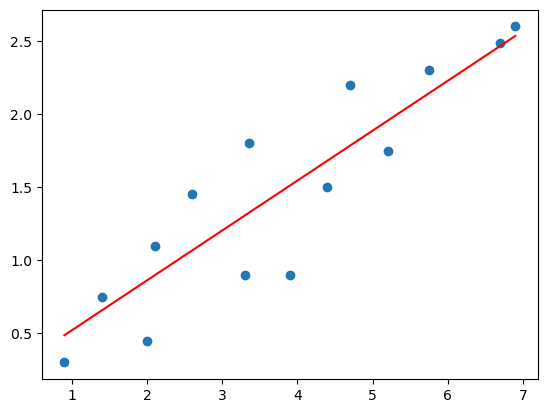

In [14]:
# 학습률 0.1로 200번 경사 하강
th_0, th_1, cost_list = gradient_descent(th_0, th_1, house_size, house_price, 200, 0.1)

In [15]:
th_0, th_1

(np.float64(0.16821801417752186), np.float64(0.3438032402351199))

In [16]:
#scikit learn
import pandas as pd

boston_df = pd.read_csv("https://codeit-assets.s3.ap-northeast-2.amazonaws.com/tutorials/temp/boston.csv")
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
import sklearn
print(sklearn.__version__)


1.6.1


In [20]:
boston_df.shape

(506, 14)

In [21]:
x = boston_df.drop(columns='MEDV')
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
x = x[['AGE']]
x

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [23]:
y = boston_df[['MEDV']]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# 선형회귀
model = LinearRegression()

In [32]:
model.fit(x_train, y_train)

LinearRegression()

In [33]:
model.coef_

array([[-0.12402883]])

In [34]:
model.intercept_

array([31.04617413])

In [35]:
#f(x) = 31.04617413 -0.12402883x
#최적선
y_test_prediction = model.predict(x_test)
y_test_prediction

array([[20.31768041],
       [28.14389953],
       [22.84786852],
       [18.64329122],
       [24.62148078],
       [19.99520545],
       [19.75955068],
       [22.79825699],
       [20.92542167],
       [21.74401194],
       [23.29437231],
       [25.41526529],
       [21.53316293],
       [25.94858925],
       [23.76568186],
       [24.55946636],
       [18.64329122],
       [18.64329122],
       [22.00447248],
       [18.64329122],
       [18.89134887],
       [18.90375176],
       [21.33471681],
       [22.71143681],
       [28.46637448],
       [19.06498923],
       [24.31140871],
       [22.05408402],
       [26.32067574],
       [26.59353916],
       [19.0153777 ],
       [18.85414022],
       [19.30064401],
       [18.7301114 ],
       [28.76404367],
       [18.92855752],
       [21.5579687 ],
       [19.21382383],
       [19.69753626],
       [29.08651863],
       [19.56110455],
       [18.64329122],
       [21.02464473],
       [20.14404005],
       [24.72070384],
       [25

In [36]:
#비교 실제 y_test 와 최적선의 y_test_prediction
#평균 제곱 오차
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_prediction)#평균제곱 오차

67.8462187008521

In [37]:
mean_squared_error(y_test, y_test_prediction)**0.5#평균제곱근오차(8000천달러오차)

8.236881612652455

In [39]:
#1-26. 범죄율로 집값 예측
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd  

# 보스턴 집 데이터 갖고 오기
# boston_house_dataset = datasets.load_boston()

# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
# X = pd.DataFrame(boston_house_dataset.data, columns=boston_house_dataset.feature_names)
X = boston_df.drop(columns='MEDV')

# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
# y = pd.DataFrame(boston_house_dataset.target, columns=['MEDV'])
y = boston_df[['MEDV']]

X = X[['CRIM']]  # 범죄율 열만 사용

# train_test_split를 사용해서 주어진 데이터를 학습, 테스트 데이터로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

linear_regression_model = LinearRegression()  # 선형 회귀 모델을 가지고 오고 
linear_regression_model.fit(X_train, y_train)  # 학습 데이터를 이용해서 모델을 학습 시킨다

y_test_predict = linear_regression_model.predict(X_test)  # 학습시킨 모델로 예측

# 평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단
mse = mean_squared_error(y_test, y_test_predict)

mse ** 0.5


8.180697228317348

# 2. 다중 선형 회귀

In [41]:
#2-1. 다중 선형 회귀 Multiple Linear Regression
#2-2. 다중 선형 회귀 표현법 &
#다중 선형 회귀 가설 함수
#다중 선형 회귀 경사 하강법
#다중 선형 회귀 구현하기 쉽게 표현하기
#다중 선형 회귀가설 함수 구현하기
import numpy as np

def prediction(X, theta):
    """다중 선형 회귀 가설 함수. 모든 데이터에 대한 예측 값을 numpy 배열로 리턴한다"""
    return X @ theta
    
    
# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 파라미터 theta 값 정의
theta = np.array([1, 2, 3, 4])

prediction(X, theta)


array([22. , 21.8, 21.2, 26.7, 24.7, 24.8, 25.5, 26.2, 29.7, 31.4, 33.1,
       33.9, 39. , 39.4, 39.5, 40. ])

In [ ]:
#다중 선형 회귀 경사 하강법 구현하기
import numpy as np

def prediction(X, theta):
    """다중 선형 회귀 가정 함수. 모든 데이터에 대한 예측 값을 numpy 배열로 리턴한다"""
    return X @ theta

def gradient_descent(X, theta, y, iterations, alpha):
    """다중 선형 회귀 경사 하강법을 구현한 함수"""
    m = len(X)  # 입력 변수 개수 저장
    
    for _ in range(iterations):
        error = prediction(X, theta) - y
        theta = theta - alpha / m * (X.T @ error)

    return theta
    

# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 입력 변수 y 정의
y = house_price

# 파라미터 theta 초기화
theta = np.array([0, 0, 0, 0])

# 학습률 0.01로 100번 경사 하강
theta = gradient_descent(X, theta, y, 100, 0.01)

theta

array([0.11484521, 1.21120425, 0.18270523, 0.30060782])

In [42]:
#정규 방적식
# 2-12. 정규 방정식 도출하기
# 가설함수
# 예측 값과 실제 값의 차이
# 손실 함수 J 표현
# 손실 함수 계산 풀기
# 손실 함수 미분

# 2-13. 다중 선형 회귀 정규 방정식 구현하기
import numpy as np

def normal_equation(X, y):
    """설계 행렬 X와 목표 변수 벡터 y를 받아 정규 방정식으로 최적의 theta를 구하는 함수"""
    return np.linalg.pinv(X.T @ X) @ X.T @ y
    
# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 입력 변수 파라미터 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 입력 변수 y 정의
y = house_price

# 정규 방적식으로 theta 계산
theta = normal_equation(X, y)
theta


array([ 5.24706322,  1.30727421, -0.68881811, -0.8709494 ])

In [ ]:
# 2-14. 경사 하강법 vs 정규 방정식- 손실함수 세타를 최소화 하는 두가지 방법
# 2-15. Convex 함수